# 🔬 Analysis 
### Dataset: Loyalty program (`loyalty_program.csv`) 
**Objective:** Identifying trends and patterns.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None) 

df_loyalty= pd.read_csv('../data/processed/loyalty_program.csv')

df_loyalty.head()

,Unnamed: 0,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,1,100102,2017,1,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,2,100140,2017,1,6,0,6,1200,120.0,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,3,100214,2017,1,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,4,100272,2017,1,0,0,0,0,0.0,0,0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [3]:
df_loyalty.isna().sum()/df_loyalty.shape[0]*100

Unnamed: 0                      0.000000
Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.326927
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.703091
Cancellation Mon

### Distribution of flight reservations per month throughout the year

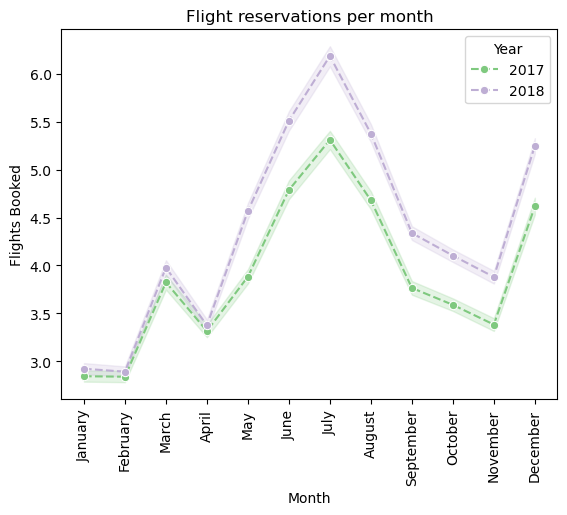

In [4]:
sns.lineplot(y= 'Flights Booked',
            x = 'Month', 
            data = df_loyalty, 
            marker='o',
            hue='Year',
            palette='Accent',
            color = 'cadetblue',
            linestyle='dashed')

plt.xticks(ticks=range(1,13),labels=[
    "January", 
    "February", 
    "March", 
    "April", 
    "May", 
    "June", 
    "July", 
    "August", 
    "September", 
    "October", 
    "November", 
    "December"
], rotation=90)

plt.title('Flight reservations per month');


The number of flight reservations is uneven throughout the year. Independently of year analyzed (2017 or 2018): 
- The number of reservations is lower in the winter months after Christmas (January and February).
- In March the number of reservations increases, which might be related to Spring Break. 
- From April to July an increasement is observed, July being the month with the maximum number of reservations. 
- From July to September the number of flights booked shrinks, continuously decreasing until November.
- In December there is a rise, probably caused by Christmas. 

In general, more flights were booked from April to December of 2018 compared to 2017.  

### Relationship between flight distance and loyalty points accumulated by customers

In [5]:
df_loyalty[['Distance', 'Points Accumulated']].corr(method='pearson')

,Distance,Points Accumulated
Distance,1.000000,0.994546
Points Accumulated,0.994546,1.000000


In [6]:
df_points = df_loyalty[(df_loyalty['Points Accumulated'] > 0) & (df_loyalty['Distance'] > 0)]

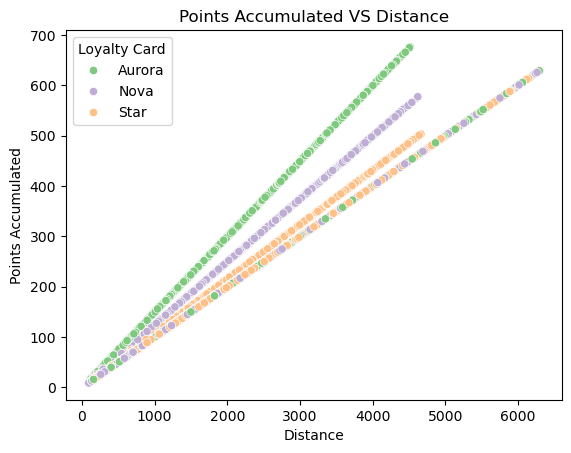

In [7]:
sns.scatterplot(x = 'Distance', 
                y = 'Points Accumulated', 
                data = df_points,
                hue='Loyalty Card',
                palette='Accent'
                )

plt.title('Points Accumulated VS Distance');

There is a strong linear correlation between 'Points Accumulated' and 'Distance,' but with distinct patterns based on loyalty card type:

- Customers with the _Aurora_ loyalty card accumulate more points per distance compared to those with the _Nova_ or _Star_ cards.
- _Star_ card users accumulate fewer points than _Nova_ card users.
- Despite three different trends for _Aurora_, _Nova_, and _Star_ users, many customers accumulate the same points per distance, regardless of their loyalty card type.

### Geographical distribution of customers by province or state

In [8]:
customers_state = df_loyalty.groupby('Province')['Loyalty Number'].nunique().reset_index() #counts customers only once.

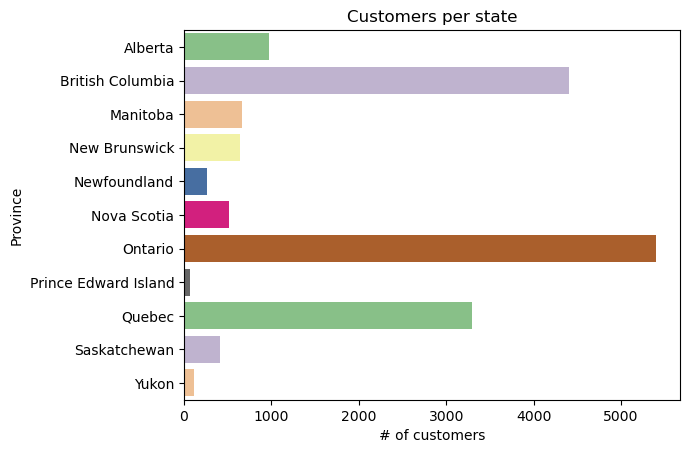

In [9]:
sns.barplot(y = 'Province', 
            x = 'Loyalty Number', 
            data = customers_state, 
            palette = 'Accent')

plt.title('Customers per state')
plt.xlabel('# of customers');

<img src="../img/Political_map_of_Canada.svg" alt="Canada map" width="500">

The distribution of a number of customers by province is not equal:

- Ontario is by far the province with the highest number of customers. However, this is not surprising, since is the most populated province of Canada.
- British Columbia and Quebec are in 2nd and 3rd place.
- Prince Edward Island has a smaller number of loyalty program users. This territory is one with the lowest population rate.

### Average salary across different educational levels of customers

📌 'College' is left out of the analysis until the treatment of the missing values is clear. 

In [10]:
education_avg_salary = df_loyalty.groupby('Education')['Salary'].mean().reset_index()

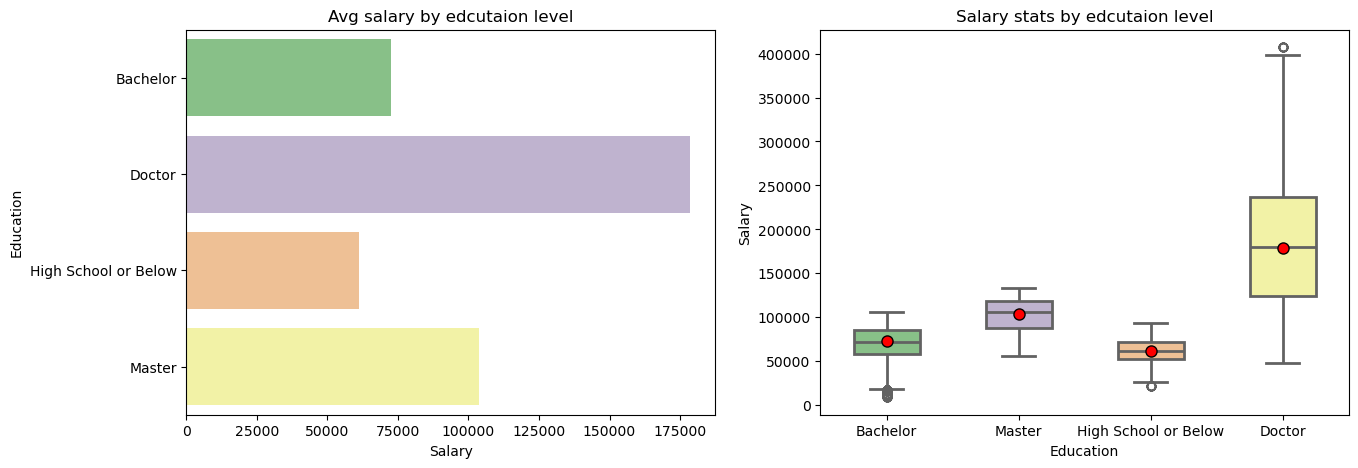

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.barplot(y = 'Education', 
            x = 'Salary', 
            data = education_avg_salary.dropna(subset=['Salary']), 
            palette = 'Accent',
            ax=axes[0])

sns.boxplot(x='Education',
               y = 'Salary', 
               data = df_loyalty.dropna(subset=['Salary']),  #this will leave 'College' out of the analysis
               width = 0.5, 
               linewidth = 2,
               palette = 'Accent',
               showmeans=True,
               meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":8},
               ax=axes[1]);

axes[0].set_title('Avg salary by edcutaion level')
axes[1].set_title('Salary stats by edcutaion level');

The average salary varies by educational level:

- Customers with a PhD (Doctorate) tend to earn the highest average annual income.
- Those with only a high school education or less have the lowest average salary.
- Customers with a master's degree earn, on average, more than those with a bachelor's degree.

Regarding the salary distribution within each educational level:

- PhD holders exhibit the widest interquartile range, indicating greater variability in their salaries.
- Customers with a bachelor's degree and the lowest income are not significantly different from those with only a high school education or less.
- Those with a high school education or less show the narrowest interquartile range, meaning their salaries are more similar to each other.

### Percentage of customers with different types of loyalty cards

In [12]:
cards = df_loyalty.groupby('Loyalty Card')['Loyalty Number'].nunique().reset_index()

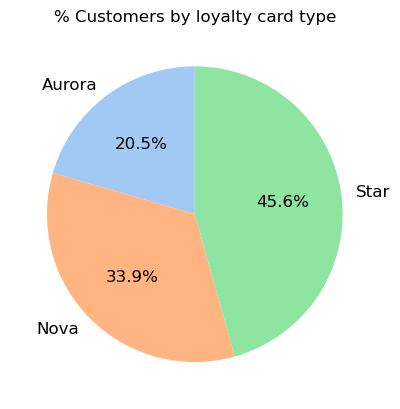

In [13]:
colors_list = sns.color_palette("pastel", 3)


# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie('Loyalty Number', labels= 'Loyalty Card',
        data = cards, 
        autopct=  '%1.1f%%', 
        colors = colors_list, 
        textprops={'fontsize': 12}, 
        startangle=90)

plt.title('% Customers by loyalty card type');

The majority of customers own a Star loyalty card.  

### Distribution of customers based on marital status and gender

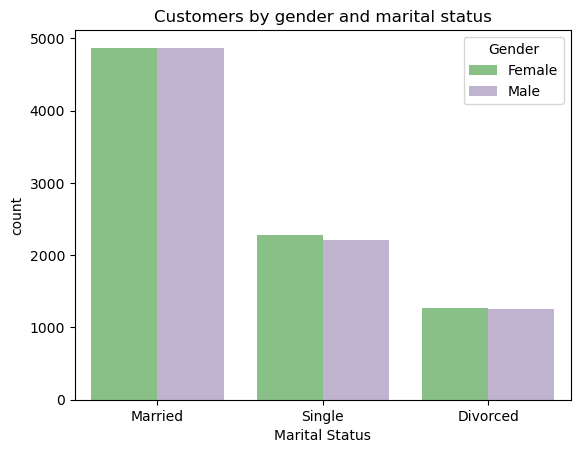

In [14]:
sns.countplot(x = 'Marital Status', 
              hue = 'Gender',
              data = df_loyalty.drop_duplicates(subset='Loyalty Number'), 
              palette = 'Accent',
              ); 

plt.title('Customers by gender and marital status');

Firstly, it appears that there are more female customers than male customers. Regarding marital status:

- Married customers are the majority.
- Divorced customers are the least.
- The male-to-female ratio is nearly the same across marital statuses. However, a notable difference is observed among single customers, where women outnumber men.